In [51]:
import matplotlib.pyplot as plt
import math
import time 
import pandas as pd
import numpy as np
from scipy import spatial
from timeit import default_timer as timer
##from docplex.mp.model import Model
#import docplex.mp.solution as Solucion

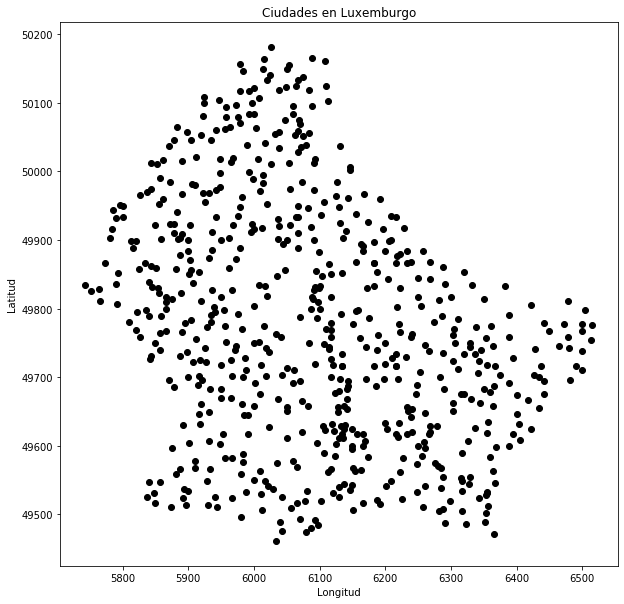

In [24]:
coordenadas=pd.read_csv(r"data.csv") #Importamos el documento que contiene las coordendas de las ciudades
coordenadas.columns=["ciudad", "c_x", "c_y"] #nombres de las columnas del dataframe
coordenadas = coordenadas.drop("ciudad", axis=1)#quitar la columna del número de ciudad
coordenadas = coordenadas.drop_duplicates() #quitamos las ciudades repetidas

ciudades=[i for i in range(len(coordenadas))] #Se crean las 980 ciuades
caminos =[(i,j) for i in ciudades for j in ciudades if i!=j] #todos las uniones posibles entre ciudades



lo=coordenadas["c_x"].tolist() #coordendas de longitud
la=coordenadas["c_y"].tolist() #coordenadas de latitud


plt.figure(figsize=(10,10)) #Grafiquemos las ciudades de Luxemburgo
plt.scatter(la,lo,color='black')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Ciudades en Luxemburgo")  
plt.show()

matriz_distancias = spatial.distance.cdist(coordenadas, coordenadas, metric='euclidean') #Creamos la matriz de distancias donde la entrada (i,j) es la distancia de la ciudad i a la ciudad j
matriz_distancias =pd.DataFrame(matriz_distancias) #Convertimos en array en un DataFrame
matriz_distancias = matriz_distancias.astype(int) #lo redondeamos

##-------------------------------------------------------------



In [58]:
#Codigos originales Sofia 
def ciudades_sin_visitar(sin_visitar):
    for i in sin_visitar:
        if i == 1:
            return True
    return False


def mejor_ruta(ciudades, ruta, min_distancia):
    ruta_mas_corta= ruta[0]
    distancia_mas_corta = min_distancia.item(0)
    for ciudad_inicial in range(0, ciudades):
        if min_distancia[ciudad_inicial] < distancia_mas_corta:
            distancia_mas_corta = min_distancia.item(ciudad_inicial)
            ruta_mas_corta = ruta[ciudad_inicial]

    print("La distancia mínima es de: " + str(distancia_mas_corta))
    print("La ruta más corta es: ")
    print(ruta_mas_corta)

    return distancia_mas_corta, ruta_mas_corta
def algorithm(n):
    ciudades = n #len(matriz_distancias) #número de ciudades que queremos en la ruta
    m = matriz_distancias #renonmbramos para facilitar el algoritmo

    min_distancia = np.zeros((ciudades,), dtype=float)  # distancia mínima del nodo inicial
    ruta = [[0 for i in range(0, ciudades)] for k in range(0, ciudades)]

    # primero seleccionamos la ciuadad inicial
    for ciudad_inicial in range(0, ciudades):
        # Repetir hasta que todas las ciudades se visiten a lo más una vez
        sin_visitar = np.ones((ciudades,), dtype=int)  # ningún nodo se ha visitado
        sin_visitar[ciudad_inicial] = 0
        ruta[ciudad_inicial][0] = ciudad_inicial  # travel route starts with start_node

        ciudad = ciudad_inicial
        it = 1
        while ciudades_sin_visitar(sin_visitar) and it < ciudades:
            # Buscamos todos los caminos (arcos) que salen del la primera ciudad que se visita y van a un nodo no visitado y se elige el más corto
            cercano_cam = float('inf')
            cercano_ciud = ciudades

            for ciudad2 in range(0, ciudades):
                if sin_visitar[ciudad2] == 1 and 0 < m[ciudad][ciudad2] < cercano_cam:
                    cercano_cam =  m[ciudad][ciudad2]
                    cercano_ciud = ciudad2

            if  cercano_ciud >= ciudades:
                min_distancia[ciudad_inicial] = float('inf')
                break

            ciudad =  cercano_ciud
            sin_visitar[ciudad] = 0
            min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + cercano_cam
            ruta[ciudad_inicial][it] = ciudad
            it = it + 1

        if not math.isinf(min_distancia[ciudad_inicial]):
            ultima_vis = ruta[ciudad_inicial][ciudades-1]
            if m[ultima_vis][ciudad_inicial] > 0:
                min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + m[ultima_vis ][ciudad_inicial]
            else:
                min_distancia[ciudad_inicial] = float('inf')


    [distancia_mas_corta, ruta_mas_corta] = mejor_ruta(ciudades, ruta, min_distancia)

    return distancia_mas_corta, ruta_mas_corta


In [59]:
#Codigos para medir la complejidad (tiempo)
def mejor_ruta_no_output(ciudades, ruta, min_distancia):
    ruta_mas_corta= ruta[0]
    distancia_mas_corta = min_distancia.item(0)
    for ciudad_inicial in range(0, ciudades):
        if min_distancia[ciudad_inicial] < distancia_mas_corta:
            distancia_mas_corta = min_distancia.item(ciudad_inicial)
            ruta_mas_corta = ruta[ciudad_inicial]
    return distancia_mas_corta, ruta_mas_corta
def algorithm_no_output(n):
    ciudades = n #len(matriz_distancias) #número de ciudades que queremos en la ruta
    m = matriz_distancias #renonmbramos para facilitar el algoritmo

    min_distancia = np.zeros((ciudades,), dtype=float)  # distancia mínima del nodo inicial
    ruta = [[0 for i in range(0, ciudades)] for k in range(0, ciudades)]

    # primero seleccionamos la ciuadad inicial
    for ciudad_inicial in range(0, ciudades):
        # Repetir hasta que todas las ciudades se visiten a lo más una vez
        sin_visitar = np.ones((ciudades,), dtype=int)  # ningún nodo se ha visitado
        sin_visitar[ciudad_inicial] = 0
        ruta[ciudad_inicial][0] = ciudad_inicial  # travel route starts with start_node

        ciudad = ciudad_inicial
        it = 1
        while ciudades_sin_visitar(sin_visitar) and it < ciudades:
            # Buscamos todos los caminos (arcos) que salen del la primera ciudad que se visita y van a un nodo no visitado y se elige el más corto
            cercano_cam = float('inf')
            cercano_ciud = ciudades

            for ciudad2 in range(0, ciudades):
                if sin_visitar[ciudad2] == 1 and 0 < m[ciudad][ciudad2] < cercano_cam:
                    cercano_cam =  m[ciudad][ciudad2]
                    cercano_ciud = ciudad2

            if  cercano_ciud >= ciudades:
                min_distancia[ciudad_inicial] = float('inf')
                break

            ciudad =  cercano_ciud
            sin_visitar[ciudad] = 0
            min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + cercano_cam
            ruta[ciudad_inicial][it] = ciudad
            it = it + 1

        if not math.isinf(min_distancia[ciudad_inicial]):
            ultima_vis = ruta[ciudad_inicial][ciudades-1]
            if m[ultima_vis][ciudad_inicial] > 0:
                min_distancia[ciudad_inicial] = min_distancia[ciudad_inicial] + m[ultima_vis ][ciudad_inicial]
            else:
                min_distancia[ciudad_inicial] = float('inf')


    [distancia_mas_corta, ruta_mas_corta] = mejor_ruta_no_output(ciudades, ruta, min_distancia)

    return distancia_mas_corta


In [60]:
tiempo = []
distancia = []
num = 10
for i in range(0,10):
    inicio = timer()
    dist = algorithm_no_output(num)
    final = timer()
    tiempo.append(final - inicio)
    distancia.append(dist)
    num = num + 10 
print(tiempo)

[0.057517823000125645, 0.1342015870004616, 0.48452956799974345, 1.0020748309998453, 1.8936719839994112, 3.250971698000285, 5.030951972000366, 7.302638618999481, 10.34336234300008, 14.953674270999727]


In [63]:
for i in range(0,10):
    inicio = timer()
    dist = algorithm_no_output(num)
    final = timer()
    tiempo.append(final - inicio)
    distancia.append(dist)
    num = num + 10 
print(tiempo)

[0.057517823000125645, 0.1342015870004616, 0.48452956799974345, 1.0020748309998453, 1.8936719839994112, 3.250971698000285, 5.030951972000366, 7.302638618999481, 10.34336234300008, 14.953674270999727, 18.703521323000132, 24.19603221699981, 29.734048839000025, 37.4780072199992, 50.610090657, 71.52063459199962, 78.42162568999993, 93.38635709799928, 124.14719059799882, 144.14781778200086]


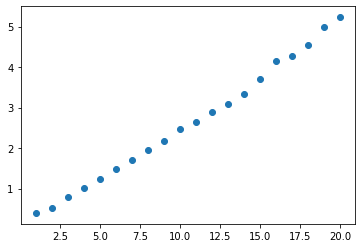

In [75]:
plt.scatter(range(1,21), np.cbrt(tiempo))

In [69]:
np.log(tiempo)

array([-2.85566041e+00, -2.00841223e+00, -7.24576822e-01,  2.07268151e-03,
        6.38517793e-01,  1.17895394e+00,  1.61560923e+00,  1.98823574e+00,
        2.33634499e+00,  2.70495704e+00,  2.92871181e+00,  3.18618866e+00,
        3.39229281e+00,  3.62375429e+00,  3.92415098e+00,  4.26998600e+00,
        4.36209973e+00,  4.53674526e+00,  4.82146788e+00,  4.97083929e+00])